In [1]:
import pandas as pd 
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import where
%matplotlib inline
import re 

In [5]:
data1 = pd.read_csv('new.csv')
data1

,Date,eNodeB Name,Cell FDD TDD Indication,Cell Name,LocalCell Id,eNodeB Function Name,Integrity,L.Thrp.bits.UL(bit),L.Thrp.bits.DL(bit),L.Thrp.Time.UL(ms),L.Thrp.Time.DL(ms),L.ChMeas.PRB.DL.Used.Avg,L.ChMeas.PRB.UL.Used.Avg,L.ChMeas.PRB.DL.Avail,L.ChMeas.PRB.UL.Avail
0,Overall,GK3801,CELL_FDD,L21_LK3801_01,1.0,LK3801,99%,7.365940e+11,6.755490e+12,909876336.0,1.568568e+09,25.0431,20.8673,50.0,50.0
1,Overall,GK3801,CELL_FDD,L21_LK3801_02,2.0,LK3801,99%,3.390020e+11,3.442700e+12,278379927.0,4.372650e+08,10.8236,10.7648,50.0,50.0
2,Overall,GK3801,CELL_FDD,L21_LK3801_03,3.0,LK3801,99%,5.102510e+11,5.167670e+12,334571833.0,4.977071e+08,10.9348,12.3003,50.0,50.0
3,Overall,G1950,CELL_FDD,L21_L1950_01,1.0,L1950,100%,8.463940e+11,7.006450e+12,348866675.0,8.340227e+08,17.7193,14.9575,50.0,50.0
4,Overall,G1950,CELL_FDD,L21_L1950_02,2.0,L1950,100%,2.540720e+11,2.337440e+12,154343735.0,2.633825e+08,7.2141,9.2530,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38414,Overall,GU4614,CELL_TDD,L26_LU4614_11,100.0,LU4614,100%,5.280741e+08,2.101184e+10,130372.0,4.725850e+05,0.0550,0.2862,1.0,1.0
38415,Overall,GU4614,CELL_TDD,L26_LU4614_01,90.0,LU4614,100%,3.214005e+09,4.359205e+10,1172590.0,3.369633e+06,0.1541,0.3615,1.0,1.0
38416,Overall,GU4614,CELL_TDD,L26_LU4614_02,91.0,LU4614,100%,4.590645e+09,7.163794e+10,2555886.0,4.896923e+06,0.2042,0.5798,1.0,1.0
38417,Overall,GU4614,CELL_TDD,L26_LU4614_03,92.0,LU4614,100%,3.099435e+09,3.648563e+10,1821162.0,2.292117e+06,0.1149,0.4815,1.0,1.0


In [7]:
tul = data1["L.Thrp.bits.UL(bit)"]/ data1["L.Thrp.Time.UL(ms)"] /1000
tdl = data1["L.Thrp.bits.DL(bit)"] / data1["L.Thrp.Time.DL(ms)"] /1000

uul = data1["L.ChMeas.PRB.UL.Used.Avg"] / data1["L.ChMeas.PRB.UL.Avail"] *100
udl = data1["L.ChMeas.PRB.DL.Used.Avg"] / data1["L.ChMeas.PRB.DL.Avail"] *100
data1["UL User throughput"] = tul
data1["DL User throughput"] = tdl
data1["UL RB Utilization"] = uul
data1["DL RB Utilization"] = udl

data1

,Date,eNodeB Name,Cell FDD TDD Indication,Cell Name,LocalCell Id,eNodeB Function Name,Integrity,L.Thrp.bits.UL(bit),L.Thrp.bits.DL(bit),L.Thrp.Time.UL(ms),L.Thrp.Time.DL(ms),L.ChMeas.PRB.DL.Used.Avg,L.ChMeas.PRB.UL.Used.Avg,L.ChMeas.PRB.DL.Avail,L.ChMeas.PRB.UL.Avail,UL User throughput,DL User throughput,UL RB Utilization,DL RB Utilization
0,Overall,GK3801,CELL_FDD,L21_LK3801_01,1.0,LK3801,99%,7.365940e+11,6.755490e+12,909876336.0,1.568568e+09,25.0431,20.8673,50.0,50.0,0.809554,4.306787,41.7346,50.0862
1,Overall,GK3801,CELL_FDD,L21_LK3801_02,2.0,LK3801,99%,3.390020e+11,3.442700e+12,278379927.0,4.372650e+08,10.8236,10.7648,50.0,50.0,1.217767,7.873257,21.5296,21.6472
2,Overall,GK3801,CELL_FDD,L21_LK3801_03,3.0,LK3801,99%,5.102510e+11,5.167670e+12,334571833.0,4.977071e+08,10.9348,12.3003,50.0,50.0,1.525087,10.382955,24.6006,21.8696
3,Overall,G1950,CELL_FDD,L21_L1950_01,1.0,L1950,100%,8.463940e+11,7.006450e+12,348866675.0,8.340227e+08,17.7193,14.9575,50.0,50.0,2.426125,8.400791,29.9150,35.4386
4,Overall,G1950,CELL_FDD,L21_L1950_02,2.0,L1950,100%,2.540720e+11,2.337440e+12,154343735.0,2.633825e+08,7.2141,9.2530,50.0,50.0,1.646144,8.874699,18.5060,14.4282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38414,Overall,GU4614,CELL_TDD,L26_LU4614_11,100.0,LU4614,100%,5.280741e+08,2.101184e+10,130372.0,4.725850e+05,0.0550,0.2862,1.0,1.0,4.050518,44.461508,28.6200,5.5000
38415,Overall,GU4614,CELL_TDD,L26_LU4614_01,90.0,LU4614,100%,3.214005e+09,4.359205e+10,1172590.0,3.369633e+06,0.1541,0.3615,1.0,1.0,2.740946,12.936736,36.1500,15.4100
38416,Overall,GU4614,CELL_TDD,L26_LU4614_02,91.0,LU4614,100%,4.590645e+09,7.163794e+10,2555886.0,4.896923e+06,0.2042,0.5798,1.0,1.0,1.796107,14.629174,57.9800,20.4200
38417,Overall,GU4614,CELL_TDD,L26_LU4614_03,92.0,LU4614,100%,3.099435e+09,3.648563e+10,1821162.0,2.292117e+06,0.1149,0.4815,1.0,1.0,1.701900,15.917872,48.1500,11.4900


In [8]:
data_filtered=data1.dropna( axis=0, how="any", thresh=None, subset=None, inplace=False)
data_filtered

,Date,eNodeB Name,Cell FDD TDD Indication,Cell Name,LocalCell Id,eNodeB Function Name,Integrity,L.Thrp.bits.UL(bit),L.Thrp.bits.DL(bit),L.Thrp.Time.UL(ms),L.Thrp.Time.DL(ms),L.ChMeas.PRB.DL.Used.Avg,L.ChMeas.PRB.UL.Used.Avg,L.ChMeas.PRB.DL.Avail,L.ChMeas.PRB.UL.Avail,UL User throughput,DL User throughput,UL RB Utilization,DL RB Utilization
0,Overall,GK3801,CELL_FDD,L21_LK3801_01,1.0,LK3801,99%,7.365940e+11,6.755490e+12,909876336.0,1.568568e+09,25.0431,20.8673,50.0,50.0,0.809554,4.306787,41.7346,50.0862
1,Overall,GK3801,CELL_FDD,L21_LK3801_02,2.0,LK3801,99%,3.390020e+11,3.442700e+12,278379927.0,4.372650e+08,10.8236,10.7648,50.0,50.0,1.217767,7.873257,21.5296,21.6472
2,Overall,GK3801,CELL_FDD,L21_LK3801_03,3.0,LK3801,99%,5.102510e+11,5.167670e+12,334571833.0,4.977071e+08,10.9348,12.3003,50.0,50.0,1.525087,10.382955,24.6006,21.8696
3,Overall,G1950,CELL_FDD,L21_L1950_01,1.0,L1950,100%,8.463940e+11,7.006450e+12,348866675.0,8.340227e+08,17.7193,14.9575,50.0,50.0,2.426125,8.400791,29.9150,35.4386
4,Overall,G1950,CELL_FDD,L21_L1950_02,2.0,L1950,100%,2.540720e+11,2.337440e+12,154343735.0,2.633825e+08,7.2141,9.2530,50.0,50.0,1.646144,8.874699,18.5060,14.4282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38413,Overall,GU4614,CELL_TDD,L26_LU4614_13,102.0,LU4614,100%,3.164525e+09,4.628864e+10,646374.0,1.328865e+06,0.0801,0.3156,1.0,1.0,4.895811,34.833215,31.5600,8.0100
38414,Overall,GU4614,CELL_TDD,L26_LU4614_11,100.0,LU4614,100%,5.280741e+08,2.101184e+10,130372.0,4.725850e+05,0.0550,0.2862,1.0,1.0,4.050518,44.461508,28.6200,5.5000
38415,Overall,GU4614,CELL_TDD,L26_LU4614_01,90.0,LU4614,100%,3.214005e+09,4.359205e+10,1172590.0,3.369633e+06,0.1541,0.3615,1.0,1.0,2.740946,12.936736,36.1500,15.4100
38416,Overall,GU4614,CELL_TDD,L26_LU4614_02,91.0,LU4614,100%,4.590645e+09,7.163794e+10,2555886.0,4.896923e+06,0.2042,0.5798,1.0,1.0,1.796107,14.629174,57.9800,20.4200


In [11]:
data_filtered.to_csv('throughput.csv', index=False)

In [3]:
df = pd.read_csv('throughput.csv')
df

,Date,eNodeB Name,Cell FDD TDD Indication,Cell Name,LocalCell Id,eNodeB Function Name,Integrity,L.Thrp.bits.UL(bit),L.Thrp.bits.DL(bit),L.Thrp.Time.UL(ms),L.Thrp.Time.DL(ms),L.ChMeas.PRB.DL.Used.Avg,L.ChMeas.PRB.UL.Used.Avg,L.ChMeas.PRB.DL.Avail,L.ChMeas.PRB.UL.Avail,UL User throughput,DL User throughput,UL RB Utilization,DL RB Utilization
0,Overall,GK3801,CELL_FDD,L21_LK3801_01,1.0,LK3801,99%,7.365940e+11,6.755490e+12,909876336.0,1.568568e+09,25.0431,20.8673,50.0,50.0,0.809554,4.306787,41.7346,50.0862
1,Overall,GK3801,CELL_FDD,L21_LK3801_02,2.0,LK3801,99%,3.390020e+11,3.442700e+12,278379927.0,4.372650e+08,10.8236,10.7648,50.0,50.0,1.217767,7.873257,21.5296,21.6472
2,Overall,GK3801,CELL_FDD,L21_LK3801_03,3.0,LK3801,99%,5.102510e+11,5.167670e+12,334571833.0,4.977071e+08,10.9348,12.3003,50.0,50.0,1.525087,10.382955,24.6006,21.8696
3,Overall,G1950,CELL_FDD,L21_L1950_01,1.0,L1950,100%,8.463940e+11,7.006450e+12,348866675.0,8.340227e+08,17.7193,14.9575,50.0,50.0,2.426125,8.400791,29.9150,35.4386
4,Overall,G1950,CELL_FDD,L21_L1950_02,2.0,L1950,100%,2.540720e+11,2.337440e+12,154343735.0,2.633825e+08,7.2141,9.2530,50.0,50.0,1.646144,8.874699,18.5060,14.4282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38412,Overall,GU4614,CELL_TDD,L26_LU4614_13,102.0,LU4614,100%,3.164525e+09,4.628864e+10,646374.0,1.328865e+06,0.0801,0.3156,1.0,1.0,4.895811,34.833215,31.5600,8.0100
38413,Overall,GU4614,CELL_TDD,L26_LU4614_11,100.0,LU4614,100%,5.280741e+08,2.101184e+10,130372.0,4.725850e+05,0.0550,0.2862,1.0,1.0,4.050518,44.461508,28.6200,5.5000
38414,Overall,GU4614,CELL_TDD,L26_LU4614_01,90.0,LU4614,100%,3.214005e+09,4.359205e+10,1172590.0,3.369633e+06,0.1541,0.3615,1.0,1.0,2.740946,12.936736,36.1500,15.4100
38415,Overall,GU4614,CELL_TDD,L26_LU4614_02,91.0,LU4614,100%,4.590645e+09,7.163794e+10,2555886.0,4.896923e+06,0.2042,0.5798,1.0,1.0,1.796107,14.629174,57.9800,20.4200


In [26]:
data1= {'x': data_filtered['Cell Name'].to_list(), 'y': data_filtered['DL User throughput'].to_list(), 'z': data_filtered['DL RB Utilization'].to_list()}
df1 = DataFrame(data1,columns=['x','y','z'])
df1

,x,y,z
0,L21_LK3801_01,0.538348,50.0862
1,L21_LK3801_02,0.984157,21.6472
2,L21_LK3801_03,1.297869,21.8696
3,L21_L1950_01,1.050099,35.4386
4,L21_L1950_02,1.109337,14.4282
...,...,...,...
38412,L26_LU4614_13,4.354152,8.0100
38413,L26_LU4614_11,5.557689,5.5000
38414,L26_LU4614_01,1.617092,15.4100
38415,L26_LU4614_02,1.828647,20.4200


In [17]:
df1.to_csv('udf.csv', index=False)

In [20]:
da1 = pd.read_csv('udf.csv')
da1

,x,y,z
0,L21_LK3801_01,4.306787,50.0862
1,L21_LK3801_02,7.873257,21.6472
2,L21_LK3801_03,10.382955,21.8696
3,L21_L1950_01,8.400791,35.4386
4,L21_L1950_02,8.874699,14.4282
...,...,...,...
38412,L26_LU4614_13,34.833215,8.0100
38413,L26_LU4614_11,44.461508,5.5000
38414,L26_LU4614_01,12.936736,15.4100
38415,L26_LU4614_02,14.629174,20.4200


In [21]:
 Data2 = { 'x':da1.index.to_list(),'y': da1['y'].to_list(),'z': da1['z'].to_list()}

df2 = DataFrame(Data2,columns=['x','y','z'])
df2

,x,y,z
0,0,4.306787,50.0862
1,1,7.873257,21.6472
2,2,10.382955,21.8696
3,3,8.400791,35.4386
4,4,8.874699,14.4282
...,...,...,...
38412,38412,34.833215,8.0100
38413,38413,44.461508,5.5000
38414,38414,12.936736,15.4100
38415,38415,14.629174,20.4200


In [22]:
dm5=df2.query( ' y<2 ' )
dm6=df2.query('y>=2 ' )
dm5

,x,y,z
22,22,1.377535,68.153400
70,70,1.475080,84.784000
100,100,0.755595,74.714400
102,102,1.553209,81.580200
157,157,1.391483,75.753200
...,...,...,...
38249,38249,1.839882,23.579333
38374,38374,1.345921,48.202800
38394,38394,0.966255,15.920000
38396,38396,1.938926,51.200000


In [26]:

#dm3=df2.query( ' y<2 ' )

dm1= df2.query( 'z >70 and y<2 ' )
dm2=df2.query('(z >70 and y>=2) or (z <=70 and y<2) or (z <=70 and y>=2)' )

dm2

,x,y,z
0,0,4.306787,50.0862
1,1,7.873257,21.6472
2,2,10.382955,21.8696
3,3,8.400791,35.4386
4,4,8.874699,14.4282
...,...,...,...
38412,38412,34.833215,8.0100
38413,38413,44.461508,5.5000
38414,38414,12.936736,15.4100
38415,38415,14.629174,20.4200


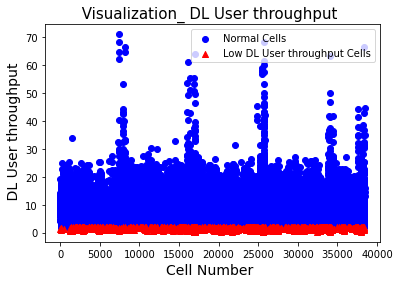

In [27]:
#from matplotlib.pyplot import figure

#figure(figsize=(7, 6), dpi=80)
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot( projection='3d')

plt.scatter(dm6.x, dm6.y,color="blue",marker="o",label='Normal Cells')
plt.scatter(dm5.x, dm5.y, color="red",marker="^",label='Low DL User throughput Cells')


plt.title(" Visualization_ DL User throughput  ",size=15)
plt.xlabel('Cell Number ',size=14)
plt.ylabel(' DL User throughput',size=14)
#ax.set_zlabel('UL RB Utilization',size=15)
plt.legend()
#ax.set_zlim(0,100)
#plt.show()


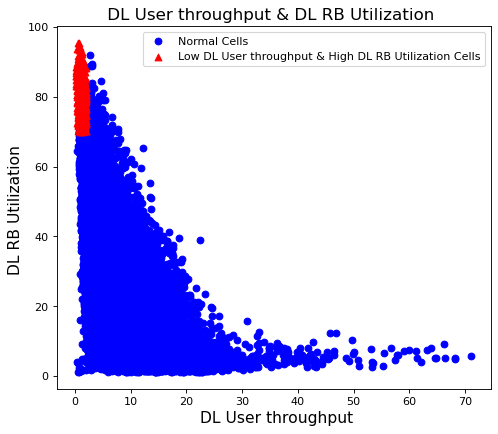

In [28]:
from matplotlib.pyplot import figure

figure(figsize=(7, 6), dpi=80)
#fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot( projection='3d')

plt.scatter(dm2.y, dm2.z,color="blue",marker="o",label='Normal Cells')
plt.scatter(dm1.y, dm1.z, color="red",marker="^",label='Low DL User throughput & High DL RB Utilization Cells')


plt.title(" DL User throughput & DL RB Utilization  ",size=15)
plt.ylabel('DL RB Utilization ',size=14)
plt.xlabel(' DL User throughput',size=14)
#ax.set_zlabel('UL RB Utilization',size=15)
plt.legend()
#ax.set_zlim(0,100)
#plt.show()
